### Домашнее задание по теме «Ансамблирование»

1. Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)
2. Построить случайный лес, вывести важность признаков
3. Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную
4. В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [2]:
 data = pd.read_csv('C:\\Users\\2-hom\\Documents\\Data_analysis\\Машинное обучение\\Занятие_11\\train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Описание файла
* SalePrice - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
* MSSubClass : класс здания
* MSZoning : Общая классификация зонирования
* LotFrontage : Линейные футы улицы, соединенной с недвижимостью
* LotArea : Размер участка в квадратных футах.
* Улица : Тип подъездной дороги
* Аллея : Тип доступа к аллее
* LotShape : Общая форма объекта
* LandContour : Плоскостность участка
* Утилиты : Тип доступных утилит
* LotConfig : конфигурация лота
* LandSlope : Уклон участка
* Район : Физические местоположения в черте города Эймс.
* Условие 1 : Близость к главной дороге или железной дороге
* Условие 2 : близость к главной дороге или железной дороге (при наличии второй)
* BldgType : Тип жилья
* HouseStyle : стиль жилья
* Общее качество : общее качество материала и отделки.
* TotalCond : общая оценка состояния
* Год постройки : Первоначальная дата постройки
* YearRemodAdd : Дата ремоделирования
* RoofStyle : Тип крыши
* RoofMatl : Материал крыши
* Exterior1st : Наружное покрытие дома
* Exterior2nd : Внешнее покрытие дома (если более одного материала)
* MasVnrType : Тип каменной кладки
* MasVnrArea : Площадь каменной кладки в квадратных футах.
* ExterQual : качество материалов экстерьера
* ExterCond : Текущее состояние материала снаружи.
* Фундамент : Тип фундамента
* BsmtQual : Высота подвала
* BsmtCond : Общее состояние подвала
* BsmtExposure : Стены подвала на уровне сада или выхода.
* BsmtFinType1 : Качество отделки цокольного этажа.
* BsmtFinSF1 : тип 1 готовых квадратных футов
* BsmtFinType2 : Качество второй готовой области (если присутствует)
* BsmtFinSF2 : тип 2 готовых квадратных футов
* BsmtUnfSF : Незавершенные квадратные футы подвального помещения.
* TotalBsmtSF : Общая площадь подвала в квадратных футах.
* Отопление : Тип отопления
* ОтоплениеQC : Качество и состояние отопления
* CentralAir : Центральное кондиционирование воздуха
* Электрика : Электрическая система
* 1stFlrSF : Квадратные футы первого этажа
* 2ndFlrSF : Квадратные футы второго этажа.
* LowQualFinSF : квадратные футы с отделкой низкого качества (все этажи)
* GrLivArea : жилая площадь над землей в квадратных футах
* BsmtFullBath : Ванные комнаты в подвале
* BsmtHalfBath : Половина ванных комнат в подвале
* FullBath : полностью оборудованные ванные комнаты выше уровня земли .
* HalfBath : полуванны выше уровня земли .
* Спальня : Количество спален над цокольным этажом
* Кухня : Количество кухонь
* KitchenQual : Качество кухни
* TotRmsAbvGrd : Общее количество комнат выше класса (не включая ванные комнаты)
* Функциональность : Рейтинг домашней функциональности
* Камины : Количество каминов
* FireplaceQu : Качество камина
* Тип гаража : место в гараже
* GarageYrBlt : Год постройки гаража.
* GarageFinish : Внутренняя отделка гаража
* GarageCars : Размер гаража по вместимости автомобиля
* GarageArea : Размер гаража в квадратных футах.
* GarageQual : качество гаража
* GarageCond : Гаражное состояние
* PavedDrive : Асфальтированная дорога
* WoodDeckSF : площадь деревянной палубы в квадратных футах.
* OpenPorchSF : площадь открытого крыльца в квадратных футах.
* EnclosedPorch : закрытая площадь крыльца в квадратных футах.
* 3SsnPorch : площадь крыльца для трех сезонов в квадратных футах.
* ScreenPorch : Площадь крыльца экрана в квадратных футах.
* PoolArea : площадь бассейна в квадратных футах.
* PoolQC : качество пула
* Забор : Качество забора
* MiscFeature : Разная функция, не включенная в другие категории.
* MiscVal : $Значение различных функций
* MoSold : Месяц продажи
* YrSold : Год продажи
* SaleType : Тип продажи
* SaleCondition : Состояние продажи

In [4]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [5]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[categorials] = data[categorials].fillna('nan')

In [6]:
#отфильтруем непрерывные признаки
integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [7]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [8]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Foundation_CBlock,HeatingQC_TA,SaleType_ConLI,Electrical_FuseF,PoolQC_Gd,SaleCondition_Family,BsmtQual_TA,LotShape_Reg,BsmtFinType1_LwQ,LotConfig_Corner
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,0,0,0,0,0,0,1,1,0,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,0,0,0,0,0,0,0,1,0,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,0,0,0,0,1,0,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,0,0,0,0,0,0,0,1
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,0,0,0,0,0


Построим модель RandomForest (Случайный лес) и  выведим важность признаков

In [9]:
# Создаем модель RandomForest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
# проверяем полученные данные на тренировочных данных
clf_rf.score(X_train, y_train)

0.9757576132890655

In [11]:
# проверяем полученные данные на тестовых данных
clf_rf.score(X_test, y_test)

0.8941099770325854

In [12]:
# Выявляем наиболее важные признаки
imp = pd.Series(clf_rf.feature_importances_)

In [13]:
imp.index = pd.Series(X_train.columns)

In [14]:
# Посмотрим на значимость признаков. Большое значение имеет признак Overall Qual, остальные близки к нулю.
imp.head(25)

Id              0.004529
MSSubClass      0.002588
LotFrontage     0.006453
LotArea         0.015125
OverallQual     0.540225
OverallCond     0.003716
YearBuilt       0.014133
YearRemodAdd    0.006577
MasVnrArea      0.002437
BsmtFinSF1      0.025185
BsmtFinSF2      0.000425
BsmtUnfSF       0.005651
TotalBsmtSF     0.029175
1stFlrSF        0.023311
2ndFlrSF        0.037223
LowQualFinSF    0.000074
GrLivArea       0.124641
BsmtFullBath    0.000866
BsmtHalfBath    0.000089
FullBath        0.002032
HalfBath        0.000913
BedroomAbvGr    0.001377
KitchenAbvGr    0.000731
TotRmsAbvGrd    0.006952
Fireplaces      0.003907
dtype: float64

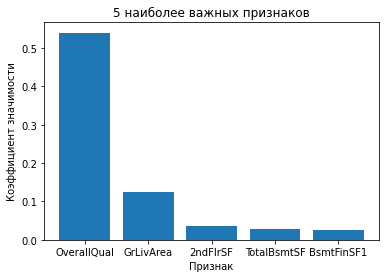

In [15]:
# Выведим на график 5 наиболее значимых признаков. На графике также видно, что большое значение имеет признак Overall Qual, остальные почти равны нулю.

plt.title('5 наиболее важных признаков')
plt.xlabel('Признак')
plt.ylabel('Коэффициент значимости')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

### Стекинг

In [16]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [17]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [18]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [19]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Качество работы на тренировочной выборке для модели {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Качество работы на тествой выборке для модели {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')


Score on train data 0.9477673661935577
Score on test data 0.8638684801596793
Качество работы на тренировочной выборке для модели LinearRegression 0.922108540356243
Качество работы на тествой выборке для модели LinearRegression 0.8533836050579312
Качество работы на тренировочной выборке для модели KNeighborsRegressor 0.7419951520813983
Качество работы на тествой выборке для модели KNeighborsRegressor 0.6775304068635524
Качество работы на тренировочной выборке для модели DecisionTree 1.0
Качество работы на тествой выборке для модели DecisionTree 0.7482946912152044


In [20]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

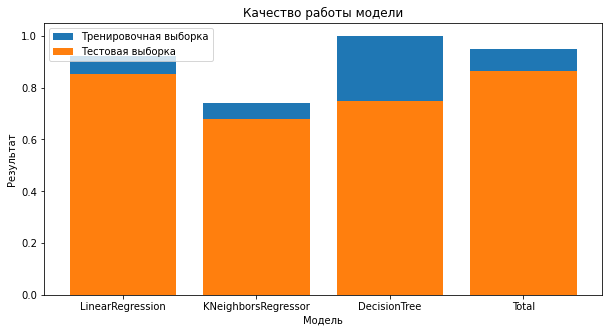

In [21]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Тренировочная выборка')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Тестовая выборка')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Качество работы модели')
plt.xlabel('Модель')
plt.ylabel('Результат')
plt.legend()